In [32]:
##I implemented a formula for this project that is reusable for other machine learning models.
##The formula calculates and displays all the metrics required for this project to best compare and analyze accuracy of models. 

In [16]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [33]:
#Viewing data details for more information and to access what preprocessing/encoding might be required

lending_df.info()
lending_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [34]:
#Seperating data into labels and features

y = lending_df['loan_status'] #this is my target/label
X = lending_df.copy()
X.drop('loan_status', axis=1, inplace=True) #the features for this are every columns except for the target

In [21]:
#Review the y variables
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [22]:
#Review the X variables 
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


In [23]:
#Splitting data for testing and training 
#Note to use random state of 1 as per instructions

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [35]:
# Viewing the X data shape to further understand the data I am working with 

X_train.shape

(58152, 7)

In [25]:
#MODEL REPORT FUNCTION

#This function is reusable for other models 
#The model covers the following steps: fits the model, sets predictions, displays metrics, creates confusion matrix, creates classification report.
#This model displays the following metrics to compare accuracy: precision, recall, f1 score, support, testing data score, AUC and training data score.

def modelReport(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}

    Training Data Score: {lr_model.score(X_train, y_train)}

    ----------------------------------------
    """
    
    print(train_results)

    
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}

    Testing Data Score: {lr_model.score(X_test, y_test)}

    ---------------------------------------------
    """
    
    print(test_results)

    accuracy = f"""Accuracy score of model:
    {accuracy_score(y_test, test_preds)}

    ---------------------------------------------
    """

    print(accuracy)


    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Reds', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.show()

    F"""
 
    
    """

    target_names = ["Healthy Loan", "High-Risk Loan"]
    
    
    classification = f"""CLASSIFICATION REPORT:
    
    {classification_report(y_test, test_preds, target_names=target_names)}
 

    """
    print(classification)

In [26]:
#Initaiting the LogisticRegression model to be used in formula 

lr_model = LogisticRegression(solver='lbfgs', random_state=1)

TRAIN METRICS
    Confusion Matrix: 
    [[55967   310]
 [  116  1759]]
    
    AUC: 0.9944504741427818

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.94      0.89      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.97      0.94     58152
weighted avg       0.99      0.99      0.99     58152


    Training Data Score: 0.9926743706149401

    ----------------------------------------
    
TEST METRICS
    Confusion Matrix: 
    [[18673    86]
 [   32   593]]
    
    AUC: 0.9963734527426835

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.9

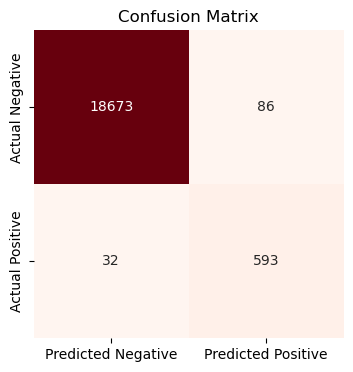

CLASSIFICATION REPORT:
    
                    precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     18759
High-Risk Loan       0.87      0.95      0.91       625

      accuracy                           0.99     19384
     macro avg       0.94      0.97      0.95     19384
  weighted avg       0.99      0.99      0.99     19384

 

    


In [27]:
#running the data through a logistic regression model using the formula

modelReport(lr_model, X_train, y_train, X_test, y_test)

In [36]:
##Evaluation of the model 

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** There are positives and negatives to this model. There are no signs of overfitting, which is good. However, it is slightly imbalanced with its predictions. The model is predicting the healthy loans more accurately than it does the high-risk loans. The percision, recall, and f-1 score are all lower for high-risk loans. Overall, the accuracy of this model is promising at 99%. 

In [28]:
###testing formula on another model in order to see ensure formula is reusable and to see if another model is more accurate/has less imbalance

TRAIN METRICS
    Confusion Matrix: 
    [[56150   127]
 [   29  1846]]
    
    AUC: 0.9998241223471992

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.94      0.98      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152


    Training Data Score: 0.9926743706149401

    ----------------------------------------
    
TEST METRICS
    Confusion Matrix: 
    [[18681    78]
 [   82   543]]
    
    AUC: 0.9958660482968175

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.93     19384
weighted avg       0.99      0.9

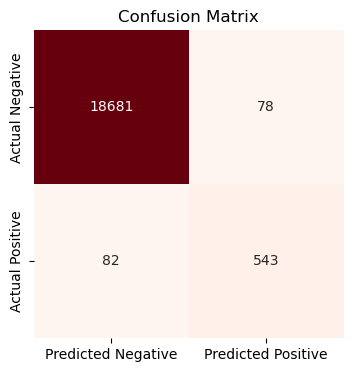

CLASSIFICATION REPORT:
    
                    precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     18759
High-Risk Loan       0.87      0.87      0.87       625

      accuracy                           0.99     19384
     macro avg       0.94      0.93      0.93     19384
  weighted avg       0.99      0.99      0.99     19384

 

    


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

modelReport(rf_model, X_train, y_train, X_test, y_test)

In [31]:
##The Random Forest does not perform as well as the Logistic Regression. 
#The scores in the classification report are better in the logistic regression. 

TRAIN METRICS
    Confusion Matrix: 
    [[55974   303]
 [   34  1841]]
    
    AUC: 0.9971741161279623

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.98      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


    Training Data Score: 0.9926743706149401

    ----------------------------------------
    
TEST METRICS
    Confusion Matrix: 
    [[18670    89]
 [   18   607]]
    
    AUC: 0.995938418892265

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.97      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.98      0.96     19384
weighted avg       0.99      0.99

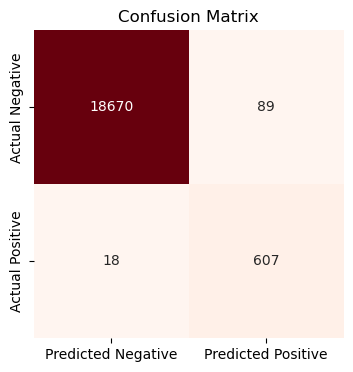

CLASSIFICATION REPORT:
    
                    precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     18759
High-Risk Loan       0.87      0.97      0.92       625

      accuracy                           0.99     19384
     macro avg       0.94      0.98      0.96     19384
  weighted avg       0.99      0.99      0.99     19384

 

    


In [39]:
#Testing with KNN, which we also commonly used in class

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)


modelReport(knn_model, X_train, y_train, X_test, y_test)